In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from keras.layers import Dense , Dropout

In [2]:
df = pd.read_csv('AI_Resume_Screening.csv')
print(df.head())
print(df.info())

   Resume_ID              Name                                        Skills  \
0          1        Ashley Ali                      TensorFlow, NLP, Pytorch   
1          2      Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
2          3     Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
3          4  Elizabeth Carney                   Python, Pytorch, TensorFlow   
4          5        Julie Hill                              SQL, React, Java   

   Experience (Years) Education                Certifications  \
0                  10      B.Sc                           NaN   
1                  10       MBA                     Google ML   
2                   1       MBA  Deep Learning Specialization   
3                   7    B.Tech                 AWS Certified   
4                   4       PhD                           NaN   

                Job Role Recruiter Decision  Salary Expectation ($)  \
0          AI Researcher               Hire              

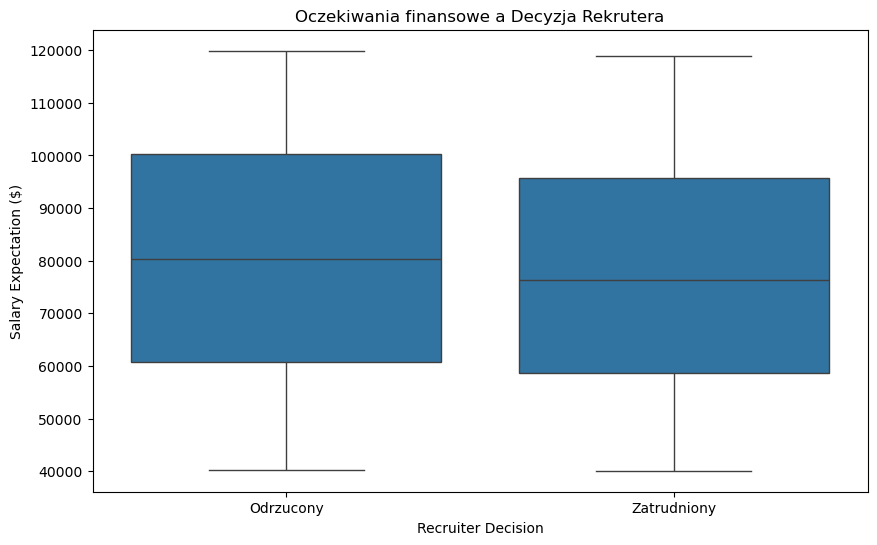

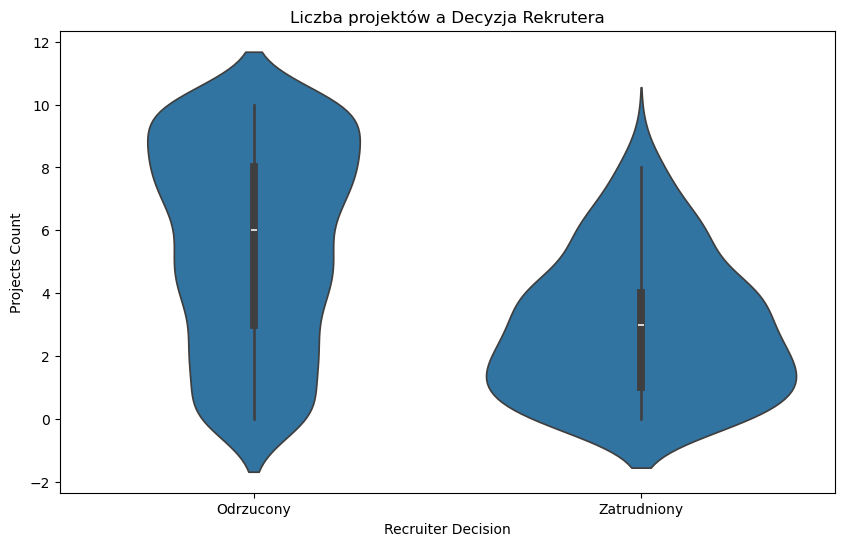

In [3]:
# Wykres dla Oczekiwań Finansowych
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recruiter Decision', y='Salary Expectation ($)', data=df)
plt.title('Oczekiwania finansowe a Decyzja Rekrutera')
plt.xticks([0, 1], ['Odrzucony', 'Zatrudniony'])
plt.savefig('boxplot_salary.png')

# Wykres dla Liczby Projektów
plt.figure(figsize=(10, 6))
sns.violinplot(x='Recruiter Decision', y='Projects Count', data=df)
plt.title('Liczba projektów a Decyzja Rekrutera')
plt.xticks([0, 1], ['Odrzucony', 'Zatrudniony'])
plt.savefig('violin_projects.png')

<Axes: xlabel='Experience (Years)', ylabel='count'>

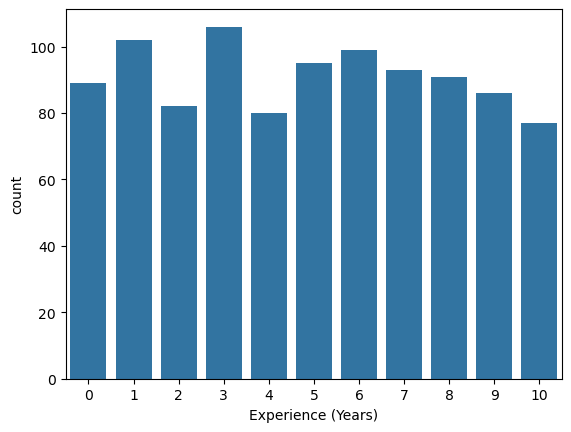

In [4]:
sns.countplot(x=df['Experience (Years)'],data=df)

<Figure size 600x1600 with 0 Axes>

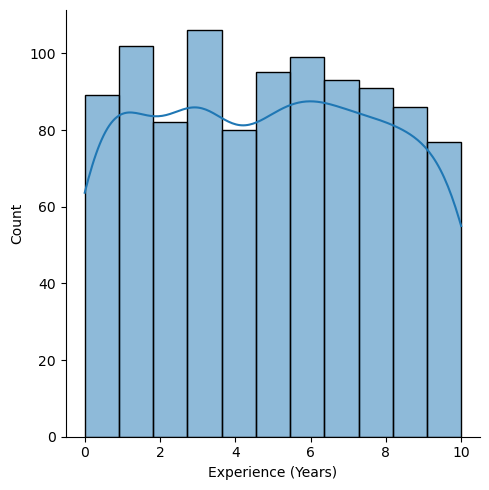

In [ ]:
plt.figure(figsize=(6,16))
sns.displot(x=df['Experience (Years)'],kde=True,kind='hist')


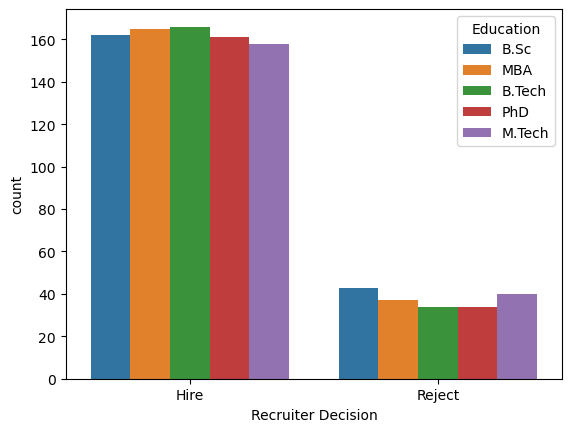

In [6]:
sns.countplot(x=df['Recruiter Decision'],hue=df['Education'])
plt.show()
# wyksztalcenie, decyzja rekrutera 

<Axes: xlabel='Salary Expectation ($)', ylabel='Count'>

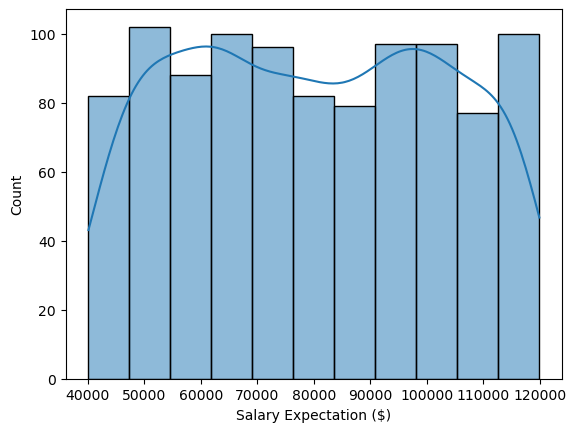

In [ ]:

sns.histplot(data=df['Salary Expectation ($)'],kde=True)

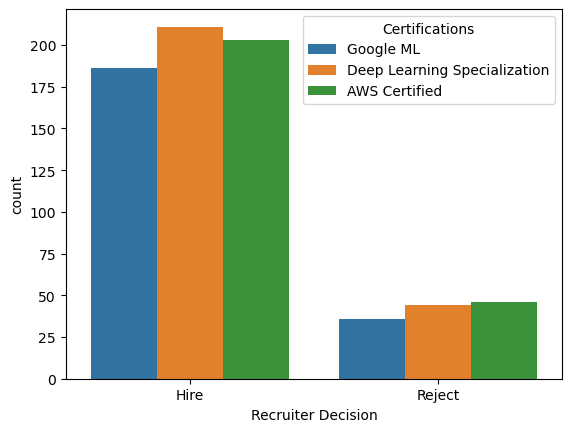

In [8]:
#decyzje rekrutera a posiadanie certyfikaty
sns.countplot(x=df['Recruiter Decision'],hue=df['Certifications'])
plt.show()

In [9]:
a=(df['Skills'].str.get_dummies(sep=','))
df=pd.concat((df,a),axis=1)   

In [10]:
df.drop(columns=['Skills','Name'],inplace=True)

In [11]:
df['Certifications'].value_counts()

Certifications
Deep Learning Specialization    255
AWS Certified                   249
Google ML                       222
Name: count, dtype: int64

In [12]:
df['Certifications'].fillna(method='bfill',inplace=True)

/var/folders/fr/xf8zmfr90fsfv_zpmb43xwb40000gn/T/ipykernel_55277/2202522968.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certifications'].fillna(method='bfill',inplace=True)
/var/folders/fr/xf8zmfr90fsfv_zpmb43xwb40000gn/T/ipykernel_55277/2202522968.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Certifications'].fillna(method='bfill',inplace=True)


In [13]:
df.isnull().sum()

Resume_ID                 0
Experience (Years)        0
Education                 0
Certifications            0
Job Role                  0
Recruiter Decision        0
Salary Expectation ($)    0
Projects Count            0
AI Score (0-100)          0
 C++                      0
 Cybersecurity            0
 Deep Learning            0
 Ethical Hacking          0
 Java                     0
 Linux                    0
 Machine Learning         0
 NLP                      0
 Networking               0
 Python                   0
 Pytorch                  0
 React                    0
 SQL                      0
 TensorFlow               0
C++                       0
Cybersecurity             0
Deep Learning             0
Ethical Hacking           0
Java                      0
Linux                     0
Machine Learning          0
NLP                       0
Networking                0
Python                    0
Pytorch                   0
React                     0
SQL                 

In [14]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [15]:
for i in df.columns:
    if df[i].dtype =='object' :
       df[i]=label.fit_transform(df[i])

In [16]:
df.drop(columns=['AI Score (0-100)'],inplace=True)
df.to_csv('data_after_filter.csv', index=False)

Pomyślnie wczytano plik 'data_after_filter.csv'.
Pobrano dane dla 'Hire' (etykieta 0).
Pomyślnie wygenerowano wykres: bar_skill_hire_rate.png

Top 5 umiejętności powiązanych z zatrudnieniem (wg danych):
Python             0.391626
SQL                0.375616
TensorFlow         0.211823
Ethical Hacking    0.209360
NLP                0.200739
Name: 0, dtype: float64


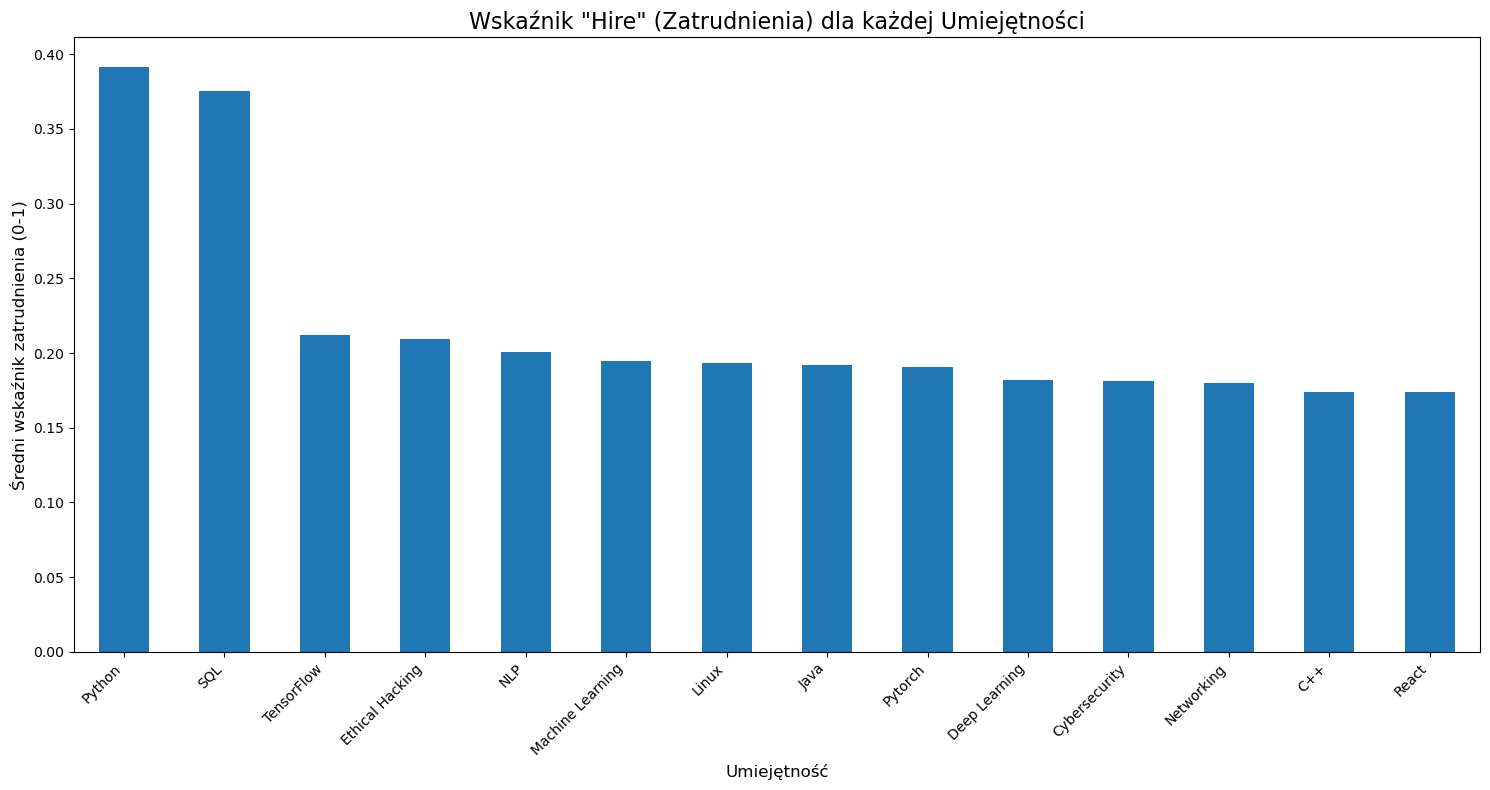

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignoruj przyszłe ostrzeżenia, aby nie zaśmiecać wyjścia
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- 1. Wczytanie Danych ---
try:
    # Wczytuje plik wygenerowany przez notatnik 'main.ipynb'
    df = pd.read_csv('data_after_filter.csv')
    print("Pomyślnie wczytano plik 'data_after_filter.csv'.")
except FileNotFoundError:
    print("BŁĄD: Nie znaleziono pliku 'data_after_filter.csv'.")
    print("Upewnij się, że najpierw uruchomiłeś notatnik 'main.ipynb', aby wygenerować ten plik.")
    df = None

if df is not None:

    # --- 2. Przygotowanie Kolumn Umiejętności ---
    
    # Lista standardowych kolumn, które NIE SĄ umiejętnościami
    standard_cols = ['Resume_ID', 'Experience (Years)', 'Education', 'Certifications', 
                     'Job Role', 'Recruiter Decision', 'Salary Expectation ($)', 'Projects Count']
    
    # Usuń spacje z WSZYSTKICH nazw kolumn (np. ' C++' -> 'C++')
    df.columns = df.columns.str.strip()
    
    # Zaktualizuj listę standardowych kolumn (one też mogły mieć spacje)
    standard_cols = [col.strip() for col in standard_cols]
    
    # Scal zduplikowane kolumny (np. jeśli 'C++' istniało dwa razy)
    # Używamy .T.groupby().max().T, aby zachować wartość '1' (posiada)
    df_cleaned = df.T.groupby(level=0).max().T
    
    # Zidentyfikuj kolumny umiejętności po czyszczeniu
    valid_skill_columns = [col for col in df_cleaned.columns if col not in standard_cols]
    
    # Upewnij się, że kolumny są numeryczne po transpozycji
    for col in df_cleaned.columns:
         df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

    # --- 3. Obliczenia i Logika Wykresu ---
    
    # Oblicz średnią wartość (wskaźnik) dla każdej umiejętności, pogrupowaną wg decyzji
    skill_hire_rate = df_cleaned.groupby('Recruiter Decision')[valid_skill_columns].mean()

    # Z 'main.ipynb' wiemy, że LabelEncoder zakodował 'Hire' jako 0 (alfabetycznie)
    hire_label = 0 
    
    if hire_label in skill_hire_rate.index:
        hire_rate_series = skill_hire_rate.loc[hire_label]
        print(f"Pobrano dane dla 'Hire' (etykieta {hire_label}).")
    else:
        print(f"OSTRZEŻENIE: Nie znaleziono etykiety 'Hire' ({hire_label}).")
        hire_rate_series = None

    # --- 4. Generowanie Wykresu ---
    
    if hire_rate_series is not None:
        plt.figure(figsize=(15, 8))
        
        # Filtrujemy, aby pokazać tylko te umiejętności, które miały jakikolwiek wskaźnik zatrudnienia
        hire_rate_series_sorted = hire_rate_series[hire_rate_series > 0].sort_values(ascending=False)
        
        # Rysuj wykres
        hire_rate_series_sorted.plot(kind='bar')
        
        # Tytuły i etykiety
        plt.title('Wskaźnik "Hire" (Zatrudnienia) dla każdej Umiejętności', fontsize=16)
        plt.ylabel('Średni wskaźnik zatrudnienia (0-1)', fontsize=12)
        plt.xlabel('Umiejętność', fontsize=12)
        plt.xticks(rotation=45, ha='right') # Poprawia czytelność osi X
        plt.tight_layout() # Zapobiega nakładaniu się etykiet
        
        # Zapisz wykres do pliku
        output_filename = 'bar_skill_hire_rate.png'
        plt.savefig(output_filename)
        print(f"Pomyślnie wygenerowano wykres: {output_filename}")
        
        # Pokaż Top 5 w konsoli
        print("\nTop 5 umiejętności powiązanych z zatrudnieniem (wg danych):")
        print(hire_rate_series_sorted.head(5))
    else:
        print("Nie można wygenerować wykresu, ponieważ brak danych dla 'Hire'.")